# Deep model explainability with SHAP values

In [48]:
# import torch
import numpy as np
import pandas as pd
# import shap
import h5py
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
from brain_age_prediction import models, utils
importlib.reload(utils)

<module 'brain_age_prediction.utils' from '/home/laurar/brain_age_1D-CNN/src/brain_age_prediction/utils.py'>

In [2]:
# paths to best model checkpoint
deep_model_path = 'lightweight-brain-age-prediction/nx218mm3/checkpoints/epoch=26-step=6102.ckpt'
# paths to saved predictions
save_dir = '/ritter/share/projects/laura_riedel_thesis/shap_values.hdf5'

# get brain area / network names
network_names = utils.get_network_names()

In [3]:
# load predictions
with h5py.File(save_dir, 'r') as f:
    deep_shap = f['deep']['full'][()]
print('Shape of SHAP values:', deep_shap.shape)

# load deep model
# deep_model = models.deep1DCNN.load_from_checkpoint(deep_model_path)
# deep_model.eval()

Shape of SHAP values: (5000, 100, 490)


/home/laurar/anaconda3/envs/cuda02/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(


deep1DCNN(
  (loss): MSELoss()
  (encoder): Sequential(
    (0): Conv1d(100, 128, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool1d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool1d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
    (9): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool1d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
    (13): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): AdaptiveAvgPool1d(output_

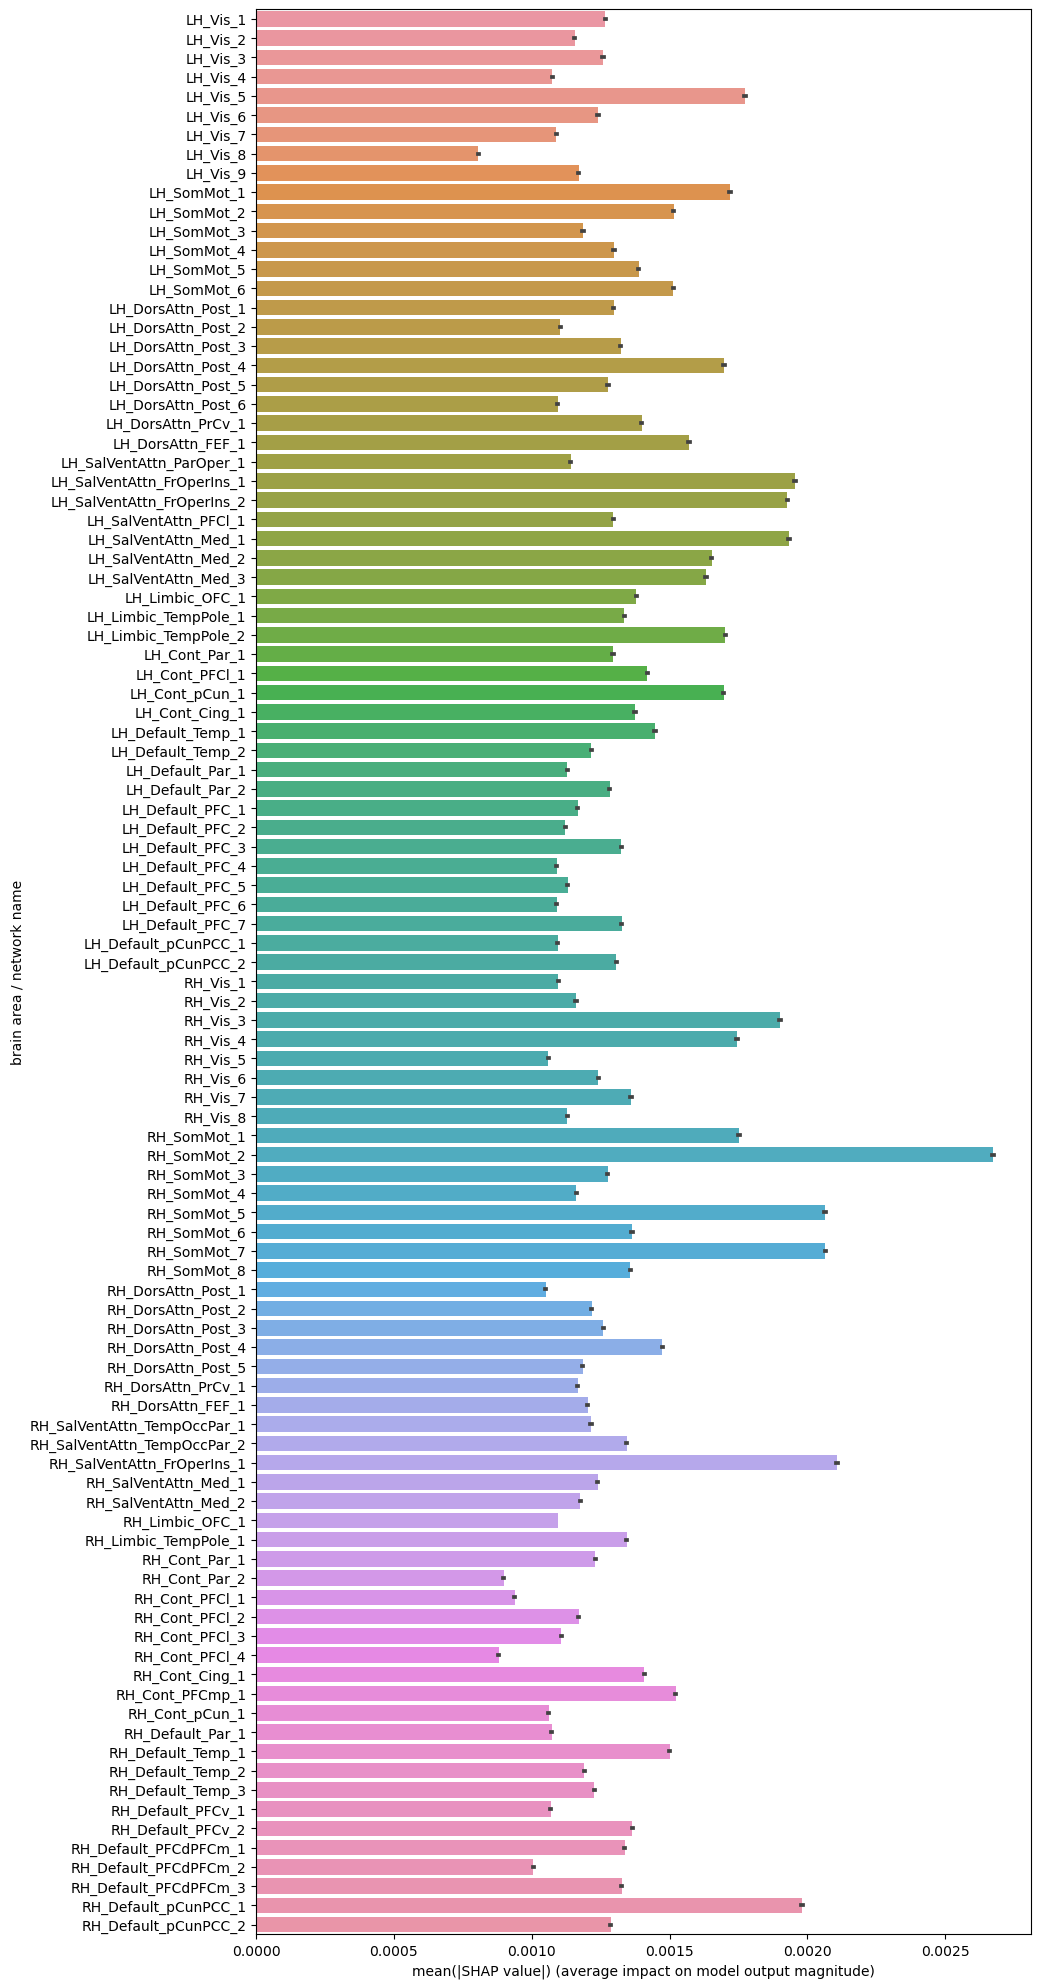

In [6]:
fig, ax = plt.subplots(figsize=(10,25))
sns.barplot(data=np.mean(np.abs(deep_shap),axis=2),
            orient='h',
            ax=ax)
ax.set(xlabel='mean(|SHAP value|) (average impact on model output magnitude)',
       ylabel='brain area / network name',
       yticklabels=network_names)
plt.show()

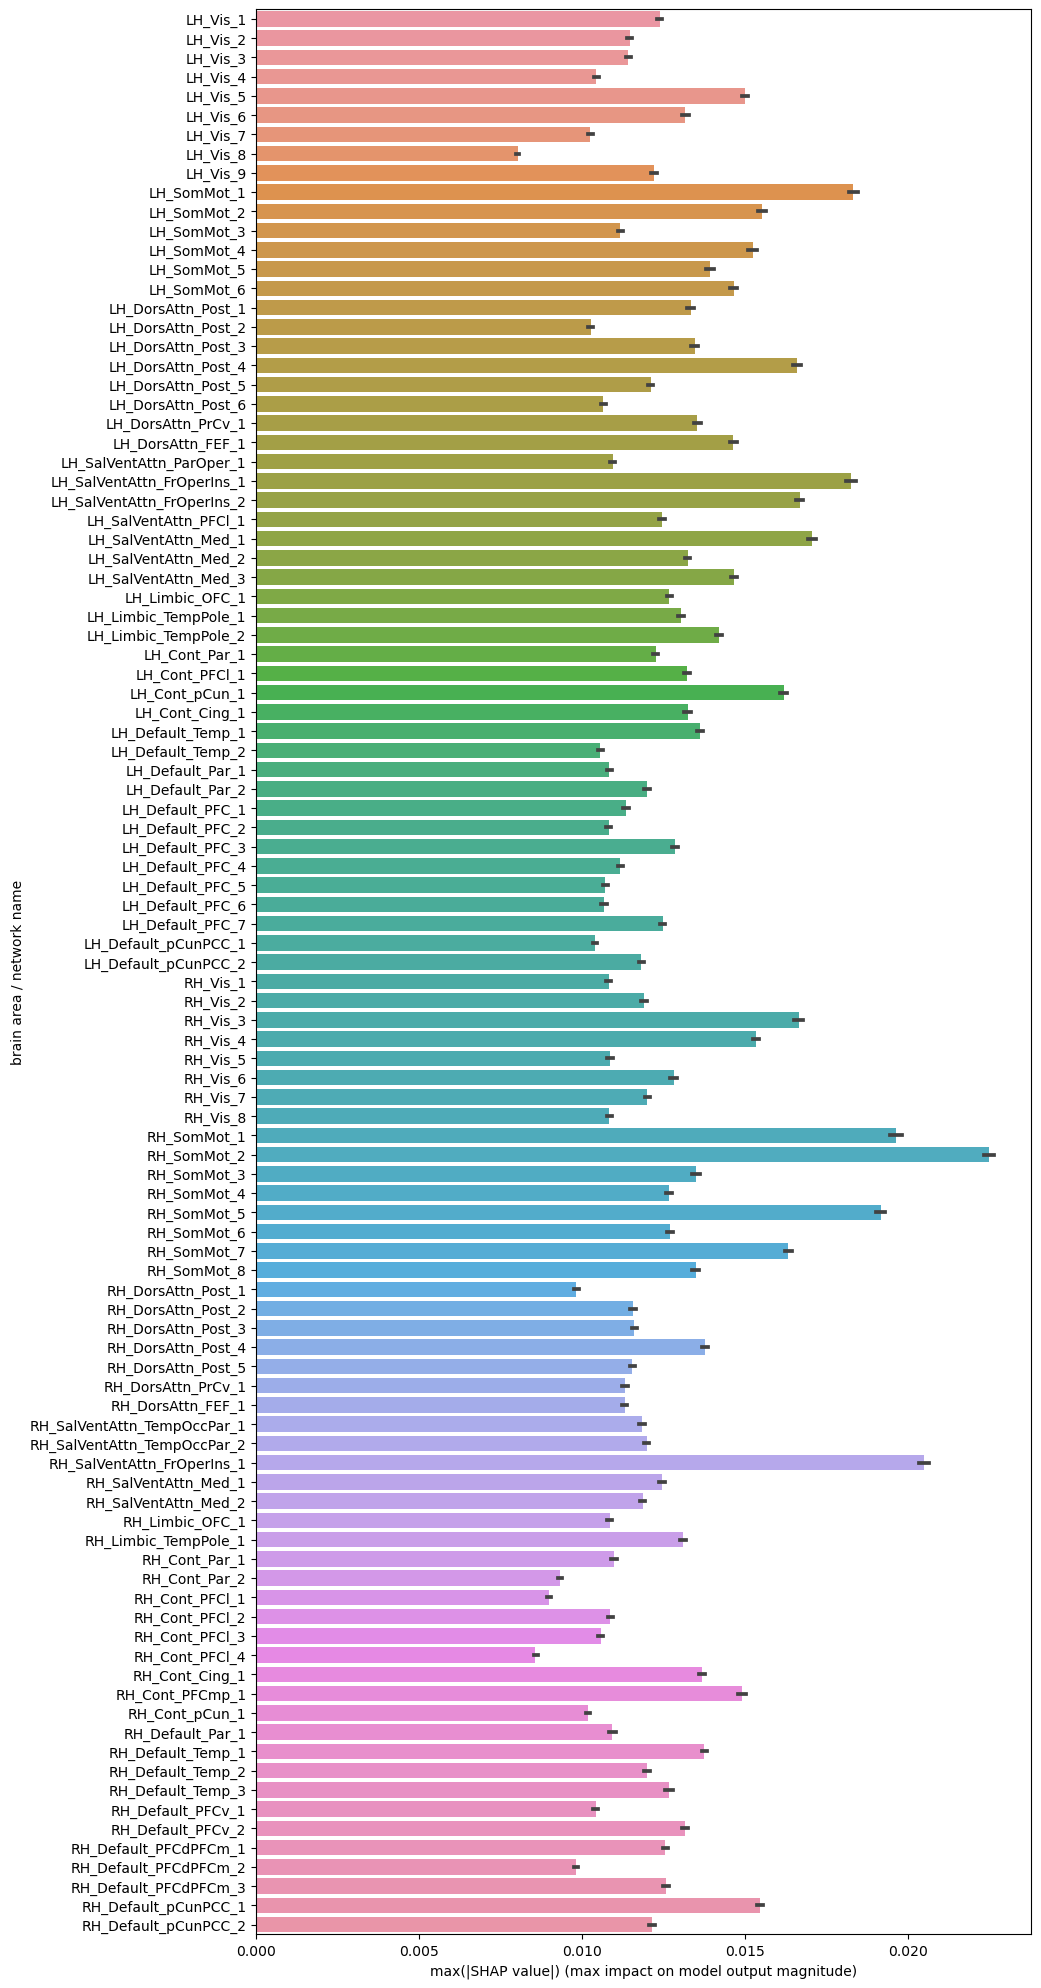

In [7]:
fig, ax = plt.subplots(figsize=(10,25))
sns.barplot(data=np.max(np.abs(deep_shap),axis=2),
            orient='h',
            ax=ax)
ax.set(xlabel='max(|SHAP value|) (max impact on model output magnitude)',
       ylabel='brain area / network name',
       yticklabels=network_names)
plt.show()

Create dataframe to sort values according to their contribution

In [8]:
deep_mean_area = np.mean(np.mean(np.abs(deep_shap),axis=2),axis=0)
deep_max_area = np.mean(np.max(np.abs(deep_shap),axis=2),axis=0)

deep_shap_df = pd.DataFrame(network_names, columns=['brain area'])
deep_shap_df['mean SHAP'] = deep_mean_area
deep_shap_df['max SHAP'] = deep_max_area

In [9]:
# 20 highest mean SHAP values
deep_shap_df.sort_values(by=['mean SHAP'], ascending=False).head(20)

,brain area,mean SHAP,max SHAP
59,RH_SomMot_2,0.002674,0.022498
75,RH_SalVentAttn_FrOperIns_1,0.002109,0.020505
64,RH_SomMot_7,0.002065,0.016336
62,RH_SomMot_5,0.002063,0.019171
98,RH_Default_pCunPCC_1,0.001980,0.015460
24,LH_SalVentAttn_FrOperIns_1,0.001954,0.018250
27,LH_SalVentAttn_Med_1,0.001932,0.017056
25,LH_SalVentAttn_FrOperIns_2,0.001927,0.016696
52,RH_Vis_3,0.001901,0.016656
4,LH_Vis_5,0.001775,0.014997


In [10]:
# 20 highest max SHAP values
deep_shap_df.sort_values(by=['max SHAP'], ascending=False).head(20)

,brain area,mean SHAP,max SHAP
59,RH_SomMot_2,0.002674,0.022498
75,RH_SalVentAttn_FrOperIns_1,0.002109,0.020505
58,RH_SomMot_1,0.001752,0.019641
62,RH_SomMot_5,0.002063,0.019171
9,LH_SomMot_1,0.001718,0.018326
24,LH_SalVentAttn_FrOperIns_1,0.001954,0.018250
27,LH_SalVentAttn_Med_1,0.001932,0.017056
25,LH_SalVentAttn_FrOperIns_2,0.001927,0.016696
52,RH_Vis_3,0.001901,0.016656
18,LH_DorsAttn_Post_4,0.001696,0.016595


In [11]:
# 20 highest mean + max SHAP values
deep_shap_df.sort_values(by=['mean SHAP', 'max SHAP'], ascending=False).head(20)

,brain area,mean SHAP,max SHAP
59,RH_SomMot_2,0.002674,0.022498
75,RH_SalVentAttn_FrOperIns_1,0.002109,0.020505
64,RH_SomMot_7,0.002065,0.016336
62,RH_SomMot_5,0.002063,0.019171
98,RH_Default_pCunPCC_1,0.001980,0.015460
24,LH_SalVentAttn_FrOperIns_1,0.001954,0.018250
27,LH_SalVentAttn_Med_1,0.001932,0.017056
25,LH_SalVentAttn_FrOperIns_2,0.001927,0.016696
52,RH_Vis_3,0.001901,0.016656
4,LH_Vis_5,0.001775,0.014997


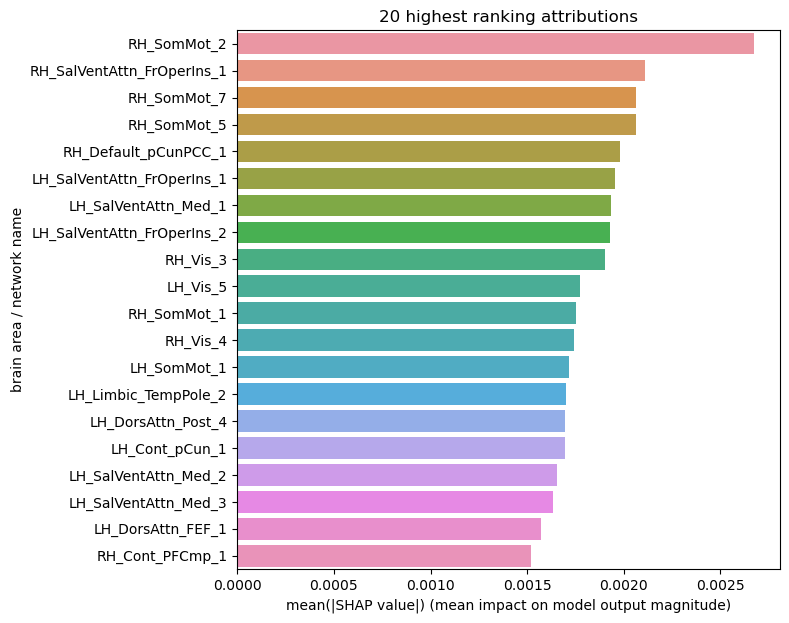

In [12]:
subset = deep_shap_df.sort_values(by=['mean SHAP'], ascending=False)[:20].copy()
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(data=subset,
            x='mean SHAP',
            y='brain area',
            orient='h',
            ax=ax)
ax.set(xlabel='mean(|SHAP value|) (mean impact on model output magnitude)',
       ylabel='brain area / network name',
       title='20 highest ranking attributions')
plt.show()

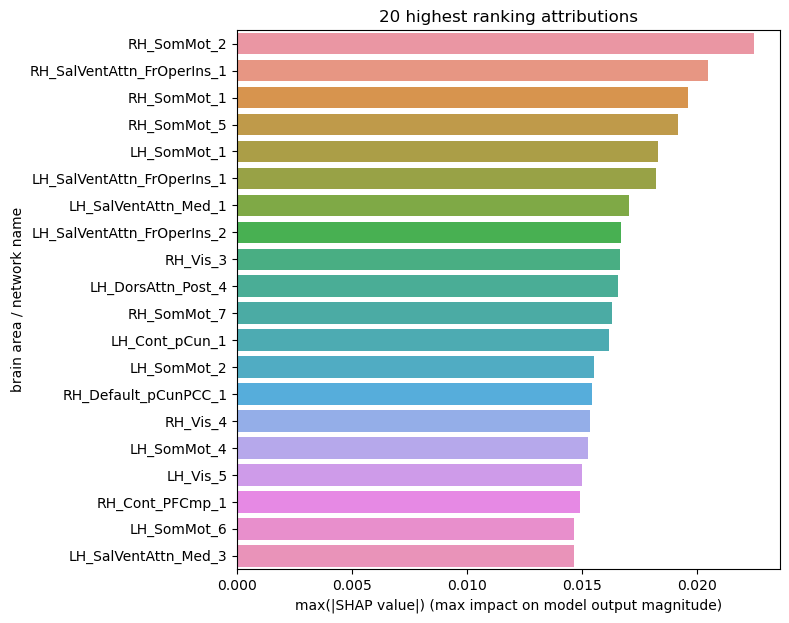

In [13]:
subset = deep_shap_df.sort_values(by=['max SHAP'], ascending=False)[:20].copy()
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(data=subset,
            x='max SHAP',
            y='brain area',
            orient='h',
            ax=ax)
ax.set(xlabel='max(|SHAP value|) (max impact on model output magnitude)',
       ylabel='brain area / network name',
       title='20 highest ranking attributions')
plt.show()

## Create long table for easier visualisations

In [50]:
shap_df = utils.create_long_df(deep_shap)

In [51]:
shap_df

,id,parcellation,hemisphere,network,area,shap,|shap|
0,1084205,LH_Vis_1,LH,Vis,fullVis,0.001303,0.001303
1,1364685,LH_Vis_1,LH,Vis,fullVis,0.001206,0.001206
2,1378042,LH_Vis_1,LH,Vis,fullVis,0.001294,0.001294
3,1243331,LH_Vis_1,LH,Vis,fullVis,0.001356,0.001356
4,1174601,LH_Vis_1,LH,Vis,fullVis,0.001195,0.001195
...,...,...,...,...,...,...,...
499995,1264831,RH_Default_pCunPCC_2,RH,Default,pCunPCC,0.001293,0.001293
499996,1251835,RH_Default_pCunPCC_2,RH,Default,pCunPCC,0.001239,0.001239
499997,1525394,RH_Default_pCunPCC_2,RH,Default,pCunPCC,0.001311,0.001311
499998,1238019,RH_Default_pCunPCC_2,RH,Default,pCunPCC,0.001359,0.001359
